# Gold Prices Prediction

## Business Objective:
### Data provided is related to gold prices. The objective is to understand the underlying structure in your dataset and come up with a suitable forecasting model which can effectively forecast gold prices for next 30 days.This forecast model will be used by gold exporting and gold importing companies to understand the metal price movements and accordingly set their revenue expectations.

### Importing Libraries

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import Grouper
import calplot
import calmap
import calendar
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
%matplotlib inline

In [2]:
#import the given dataset as a series object for time series analysis
series = pd.read_csv('data.csv',index_col=0, parse_dates=True)#, header=0, index_col=0, parse_dates=True, squeeze=True)
series

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [3]:
#converting date to date-time
series.columns=["price"]
series.index=pd.to_datetime(series.index)
series

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [4]:
series_2 = series.copy()

### Train-Test Split

In [5]:
#Doing 80:20 Split
Train=series.iloc[:1745,:]
Test=series.iloc[1745:,]

### Initial Exploration (EDA) of RAW Data

In [6]:
#descriptive statistics to know more about the raw data
series.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [7]:
#how many observations
series.size

2182

In [8]:
#check january 2016 data - COMPLETE data is present for each day including holidays
series['2016-01']

,price
date,
2016-01-01,2252.600000
2016-01-02,2454.500000
2016-01-03,2708.100000
2016-01-04,2577.800000
2016-01-05,2597.750000
2016-01-06,2617.700000
2016-01-07,2903.800000
2016-01-08,2887.800000
2016-01-09,2813.800000


In [9]:
series['2017-05'].head(8) #random may 2017

,price
date,
2017-05-01,2559.4
2017-05-02,2573.2
2017-05-03,2587.0
2017-05-04,2600.8
2017-05-05,2532.4
2017-05-06,2643.5
2017-05-07,2538.3
2017-05-08,2643.3


In [10]:
series['2021-12'] #last month only 21 days

,price
date,
2021-12-01,4353.2
2021-12-02,4238.1
2021-12-03,4017.1
2021-12-04,4170.4
2021-12-05,4305.5
2021-12-06,4413.6
2021-12-07,4319.4
2021-12-08,4181.5
2021-12-09,4219.4


In [12]:
#reading as data frame
df = pd.read_csv("data.csv")
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [13]:
#checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [14]:
#converting object to date time
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


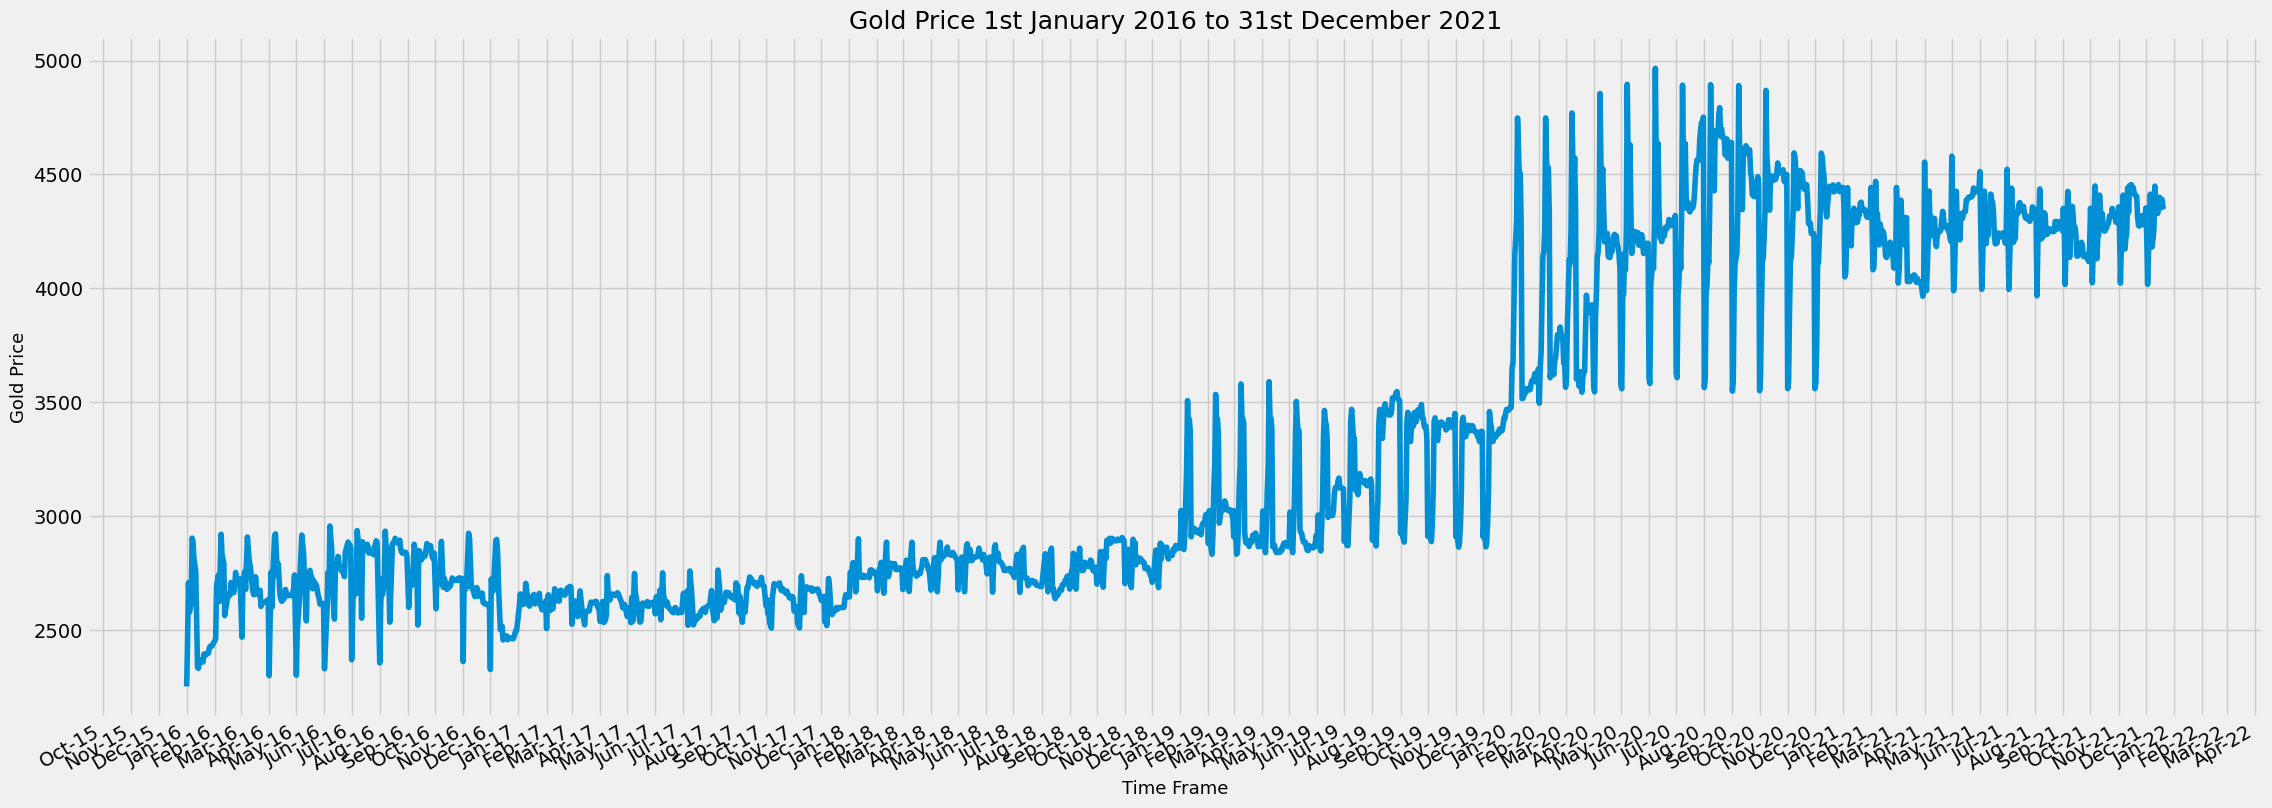

In [15]:
################# GOLD PRICE FROM BEGINNING ################

# build the frame
fig,ax = plt.subplots(figsize=(25,10))

date = df['date']
value = df['price']

# give the title, x and y axis names
plt.title("Gold Price 1st January 2016 to 31st December 2021",fontsize=18)
plt.xlabel("Time Frame",fontsize=13)
plt.ylabel("Gold Price",fontsize=13)

# display formatting
year_month_separator = mdates.MonthLocator()
year_month_formatter = mdates.DateFormatter("%b-%y")

ax.xaxis.set_major_locator(year_month_separator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(date,value);

# auto format tilt the x-axis labels
fig.autofmt_xdate()

In [16]:
df = df.set_index(['date'])
df

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


(<Figure size 2000x1500 with 6 Axes>,
 array([<AxesSubplot:ylabel='2016'>, <AxesSubplot:ylabel='2017'>,
        <AxesSubplot:ylabel='2018'>, <AxesSubplot:ylabel='2019'>,
        <AxesSubplot:ylabel='2020'>, <AxesSubplot:ylabel='2021'>],
       dtype=object))

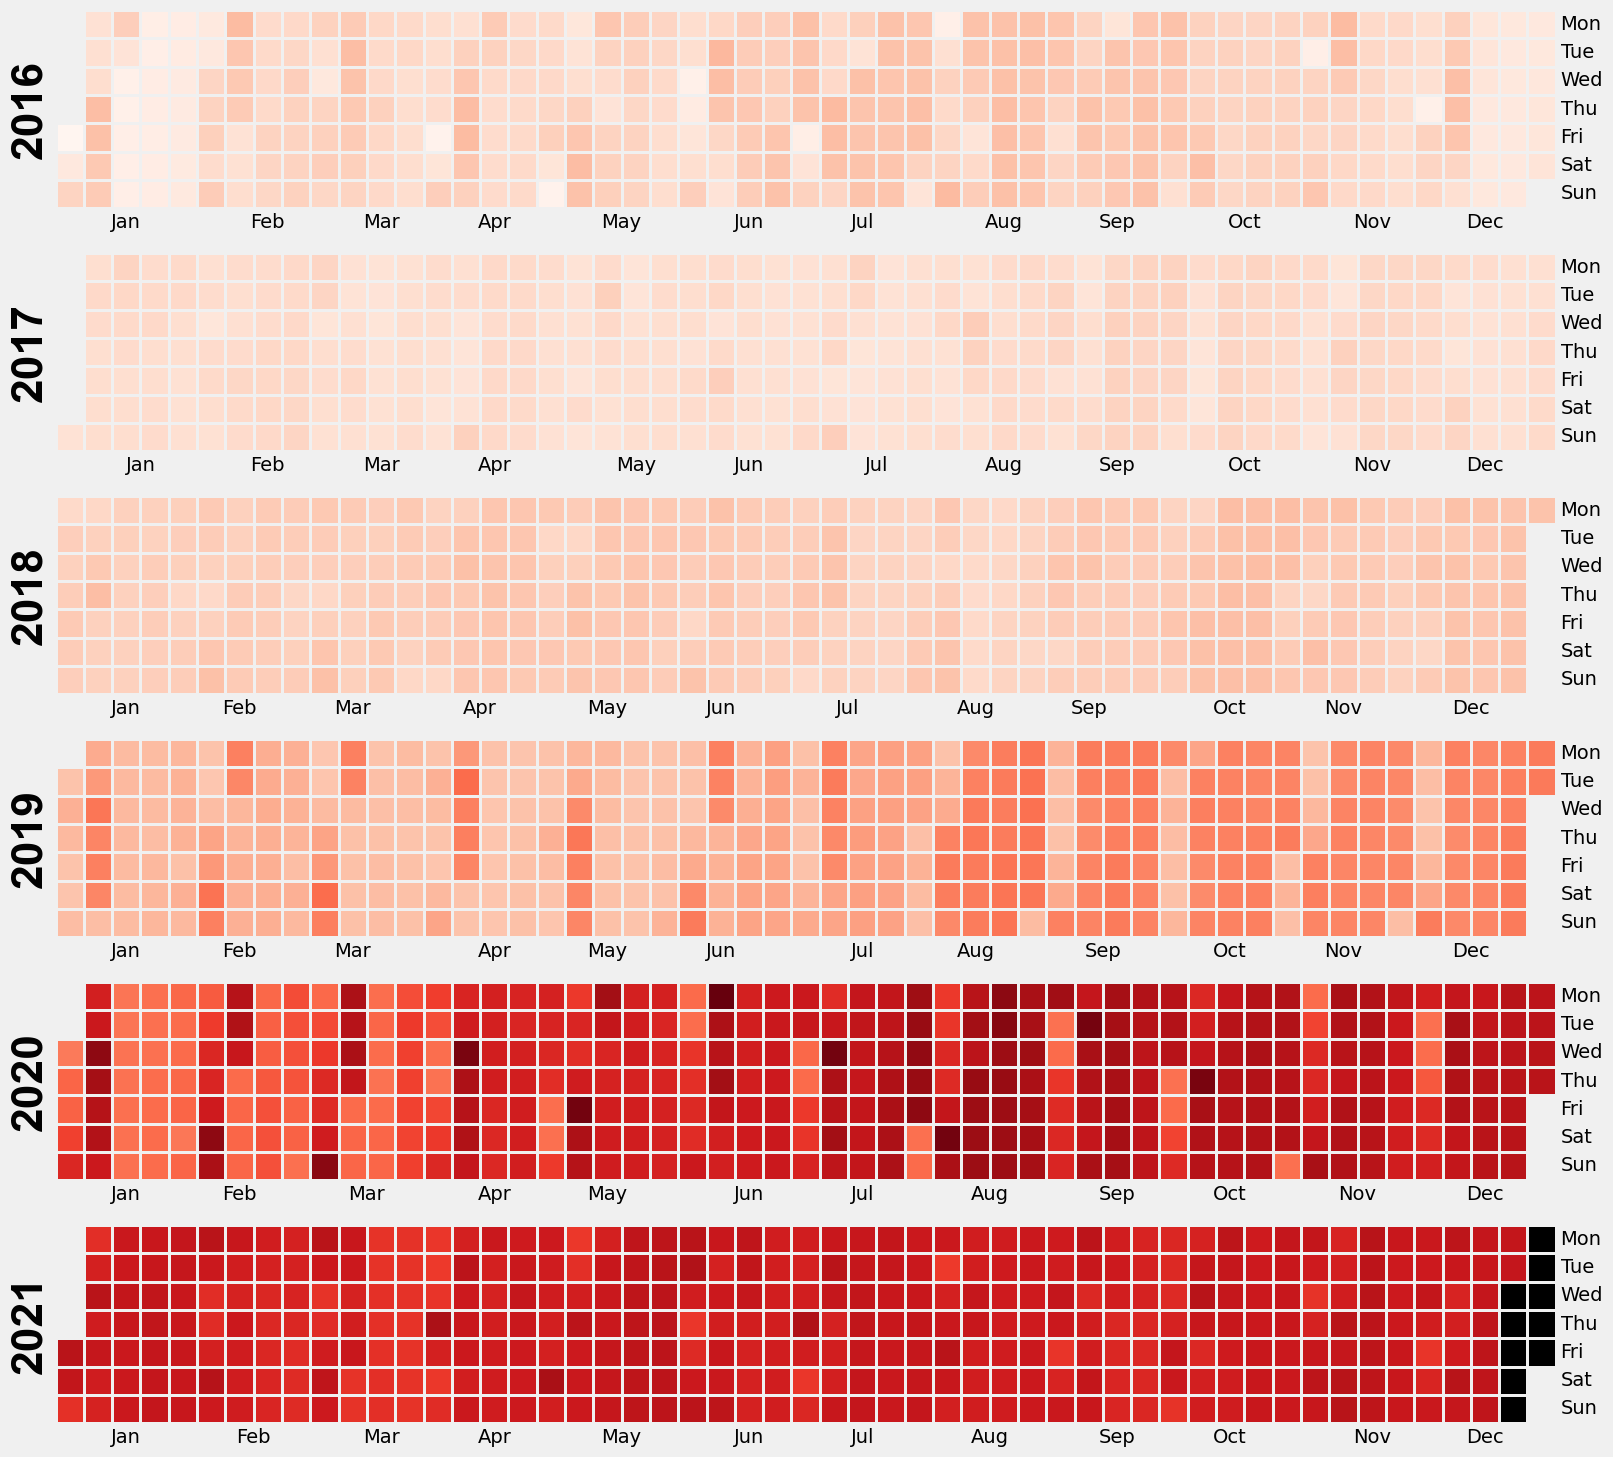

In [17]:
################ YEARLY SEASONAL PRICE #####################
calmap.calendarplot(df['price'], fillcolor='black',fig_kws=dict(figsize=(20, 15)))

In [18]:
df_2 = df.reset_index()
df_2

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [19]:
################ AVERAGE PRICE EVERY MONTH #####################

#Spliting the dates
df_2['Day'] = df_2['date'].dt.day
df_2['Month'] = df_2['date'].dt.month
df_2['Year'] = df_2['date'].dt.year
df_2

,date,price,Day,Month,Year
0,2016-01-01,2252.60,1,1,2016
1,2016-01-02,2454.50,2,1,2016
2,2016-01-03,2708.10,3,1,2016
3,2016-01-04,2577.80,4,1,2016
4,2016-01-05,2597.75,5,1,2016
...,...,...,...,...,...
2177,2021-12-17,4394.40,17,12,2021
2178,2021-12-18,4389.50,18,12,2021
2179,2021-12-19,4389.50,19,12,2021
2180,2021-12-20,4354.10,20,12,2021


In [20]:
#  Generating the avgerage open gold price
all_month_year_df = pd.pivot_table(df_2, values="price",
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
# Setting the index (month names)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

Year,2016,2017,2018,2019,2020,2021,All
Jan,2495.832258,2626.077957,2748.438710,3015.954839,3803.264516,4305.209677,3165.796326
Feb,2688.703448,2646.730357,2766.942857,3068.482143,3903.472414,4208.853571,3214.831471
Mar,2682.854839,2597.485484,2766.806452,2989.967742,3915.170968,4118.264516,3178.425000
Apr,2677.790000,2620.758333,2806.903333,2970.890000,4187.580000,4259.273333,3253.865833
May,2677.650000,2605.872581,2806.258065,2978.335484,4208.000000,4346.348387,3270.410753
Jun,2745.596667,2607.733333,2781.715000,3098.686667,4250.550000,4262.783333,3291.177500
Jul,2779.582258,2599.256452,2739.325806,3136.961290,4393.832258,4308.632258,3326.265054
Aug,2792.240323,2642.133871,2722.327419,3351.954839,4491.829032,4264.919355,3377.567473
Sep,2792.705000,2669.835000,2777.303333,3310.843333,4399.250000,4207.506667,3359.573889
Oct,2720.454839,2648.345161,2851.996774,3300.645161,4388.651613,4289.148387,3366.540323


In [21]:
type(all_month_year_df)

pandas.core.frame.DataFrame

In [22]:
#converting float to integers
all_month_year_df_2 = all_month_year_df.astype(int)
all_month_year_df_2

Year,2016,2017,2018,2019,2020,2021,All
Jan,2495,2626,2748,3015,3803,4305,3165
Feb,2688,2646,2766,3068,3903,4208,3214
Mar,2682,2597,2766,2989,3915,4118,3178
Apr,2677,2620,2806,2970,4187,4259,3253
May,2677,2605,2806,2978,4208,4346,3270
Jun,2745,2607,2781,3098,4250,4262,3291
Jul,2779,2599,2739,3136,4393,4308,3326
Aug,2792,2642,2722,3351,4491,4264,3377
Sep,2792,2669,2777,3310,4399,4207,3359
Oct,2720,2648,2851,3300,4388,4289,3366


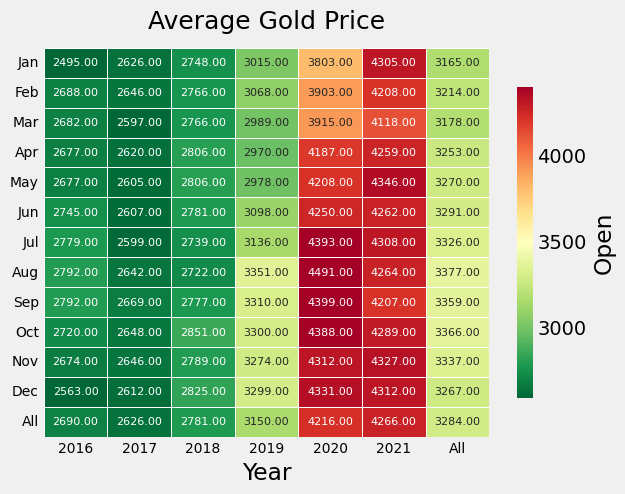

In [23]:
# plot of average gold price for all months
ax = sns.heatmap(all_month_year_df_2, cmap='RdYlGn_r', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':8}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Average Gold Price', fontdict={'fontsize':18},    pad=14);

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

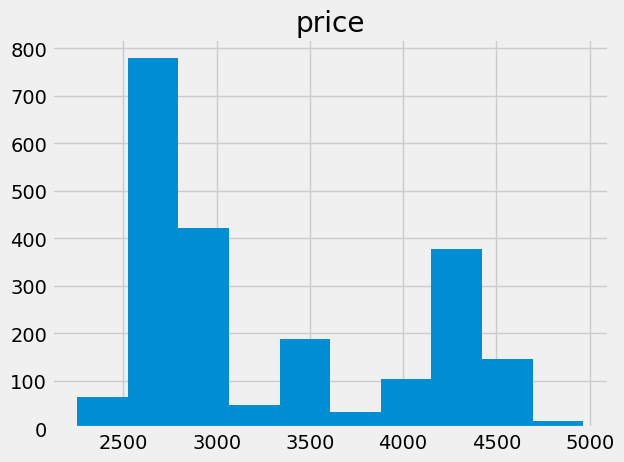

In [24]:
series.hist() #histogram plot

<AxesSubplot:ylabel='Density'>

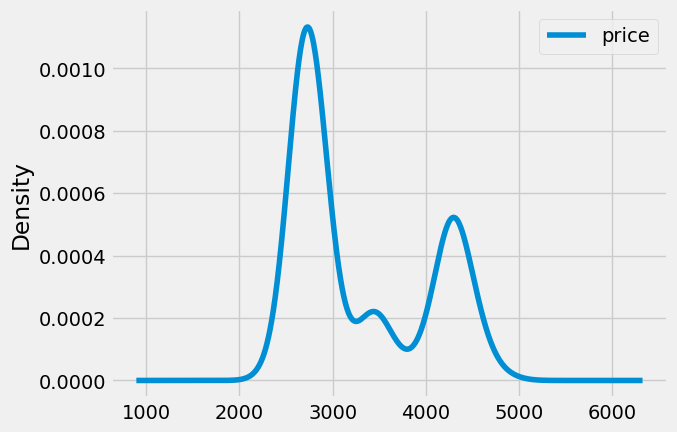

In [25]:
series.plot(kind='kde')

### Pre-processing Data for Model Building

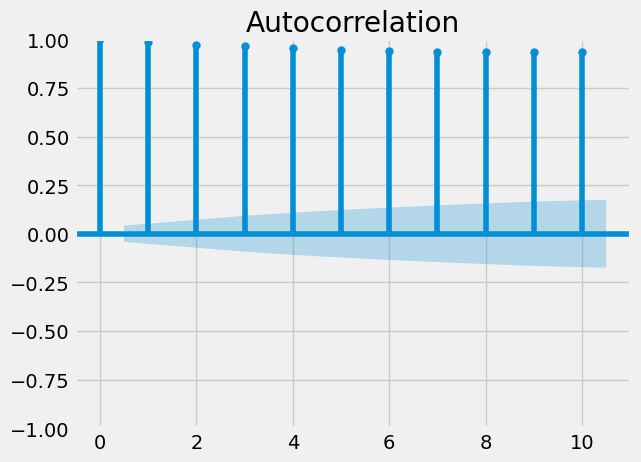

In [26]:
#auto correlation plot
plot_acf(series, lags=10)
plt.show()

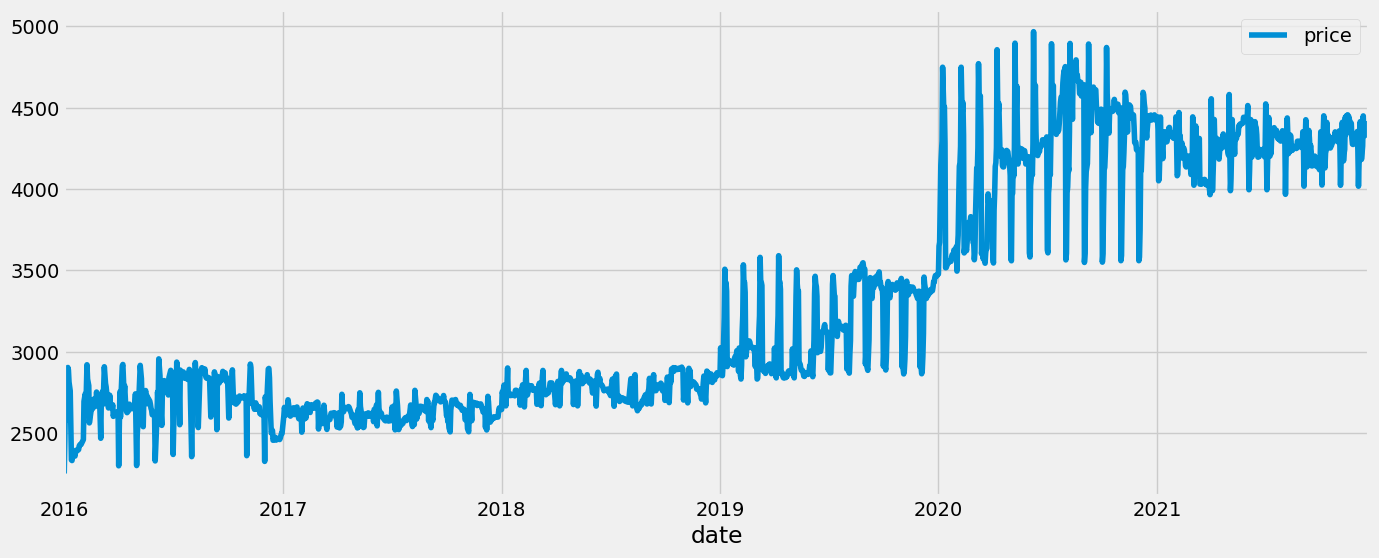

In [27]:
# overall plot for years
series.plot(figsize=(15,6))
plt.show()

In [28]:
#split series into years to show decomposition
series_jan_2016 = series['2016-01']#:'2017-01']
series_jan_2017 = series['2017-01']
series_jan_2018 = series['2018-01']
series_jan_2019 = series['2019-01']
series_jan_2020 = series['2020-01']
series_jan_2021 = series['2021-01']



*************************************************************************************ANALYSIS FOR 2016**************************************************************************



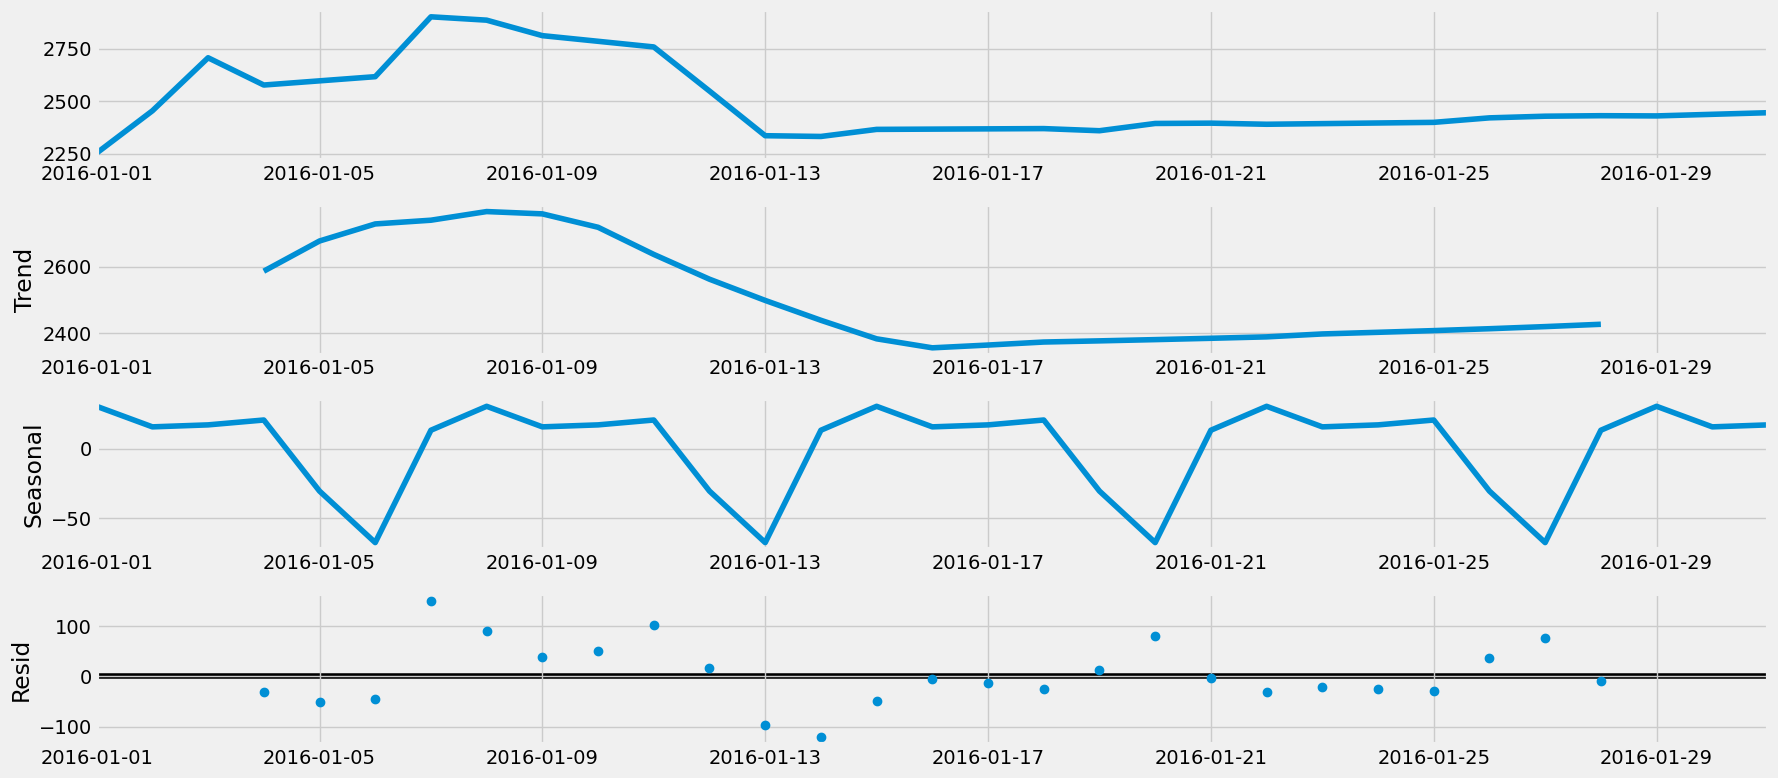



*************************************************************************************ANALYSIS FOR 2017**************************************************************************



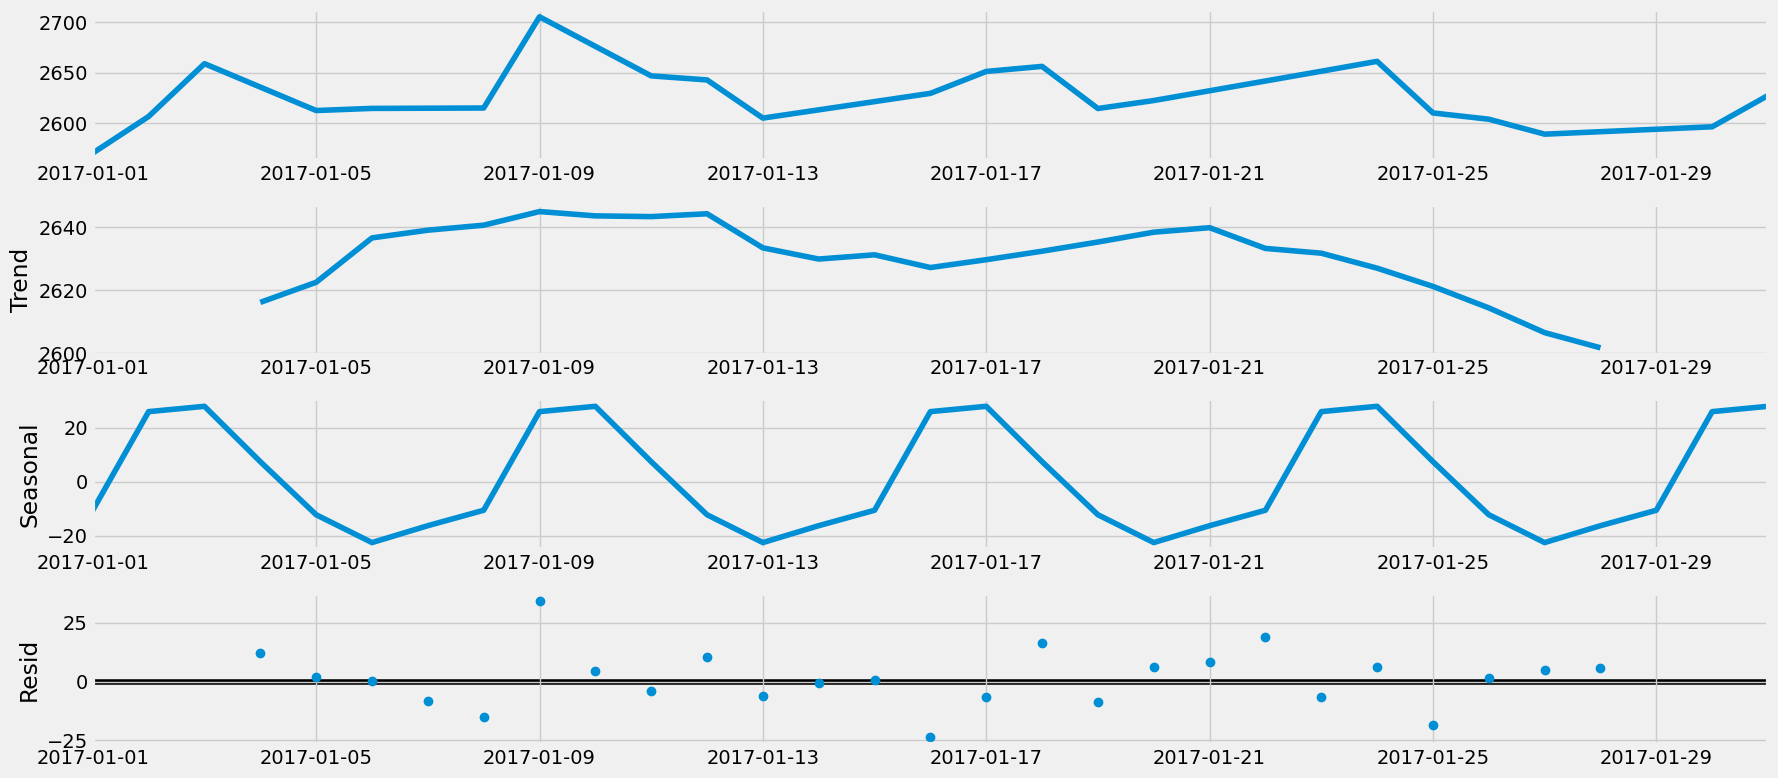



*************************************************************************************ANALYSIS FOR 2018**************************************************************************



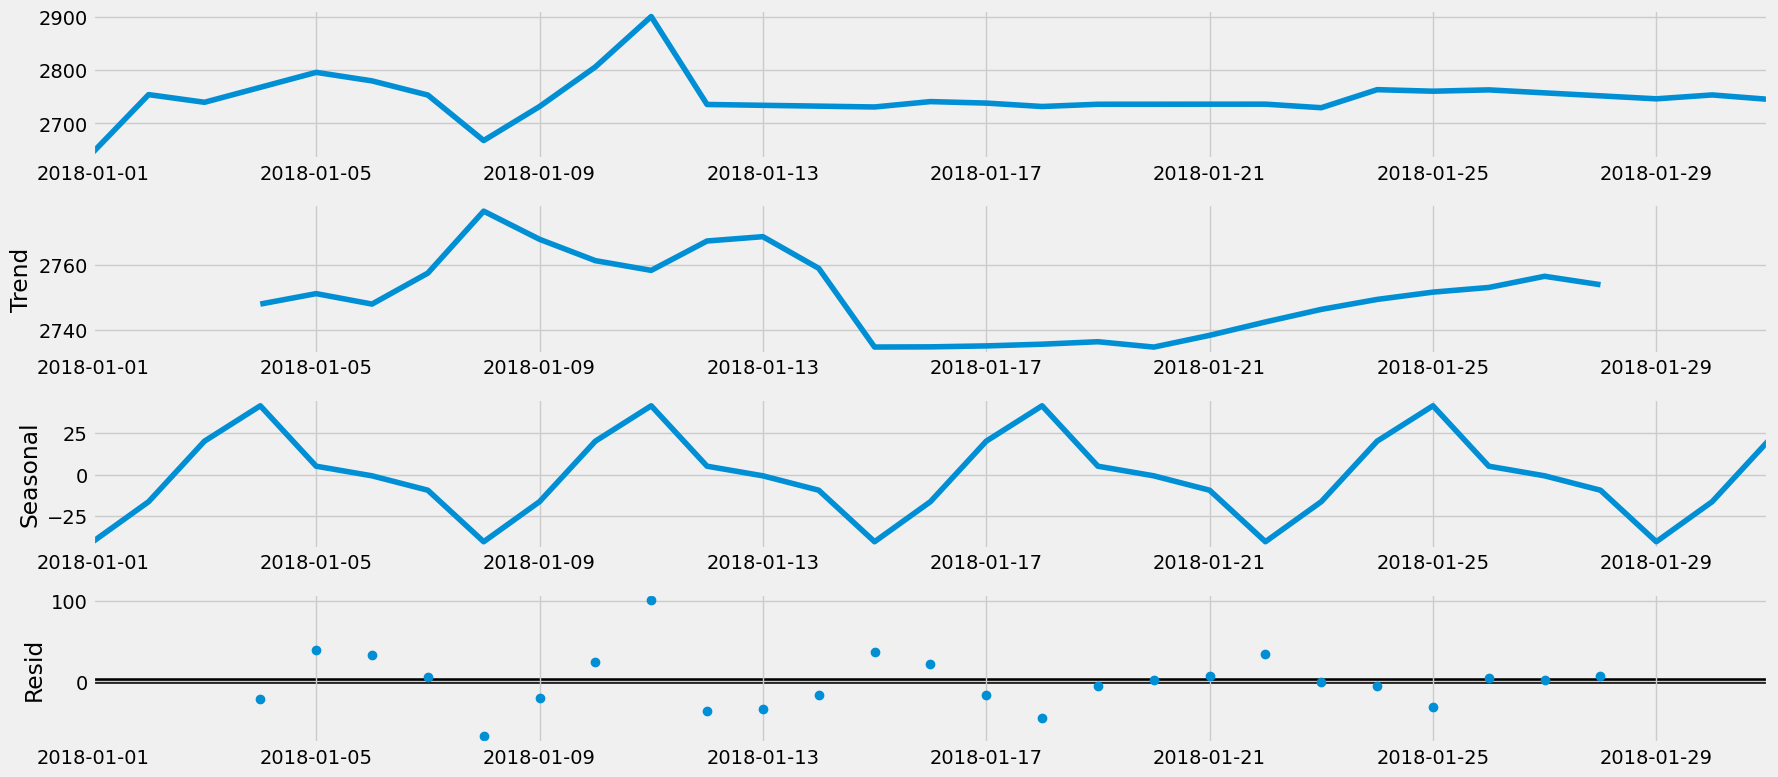



*************************************************************************************ANALYSIS FOR 2019**************************************************************************



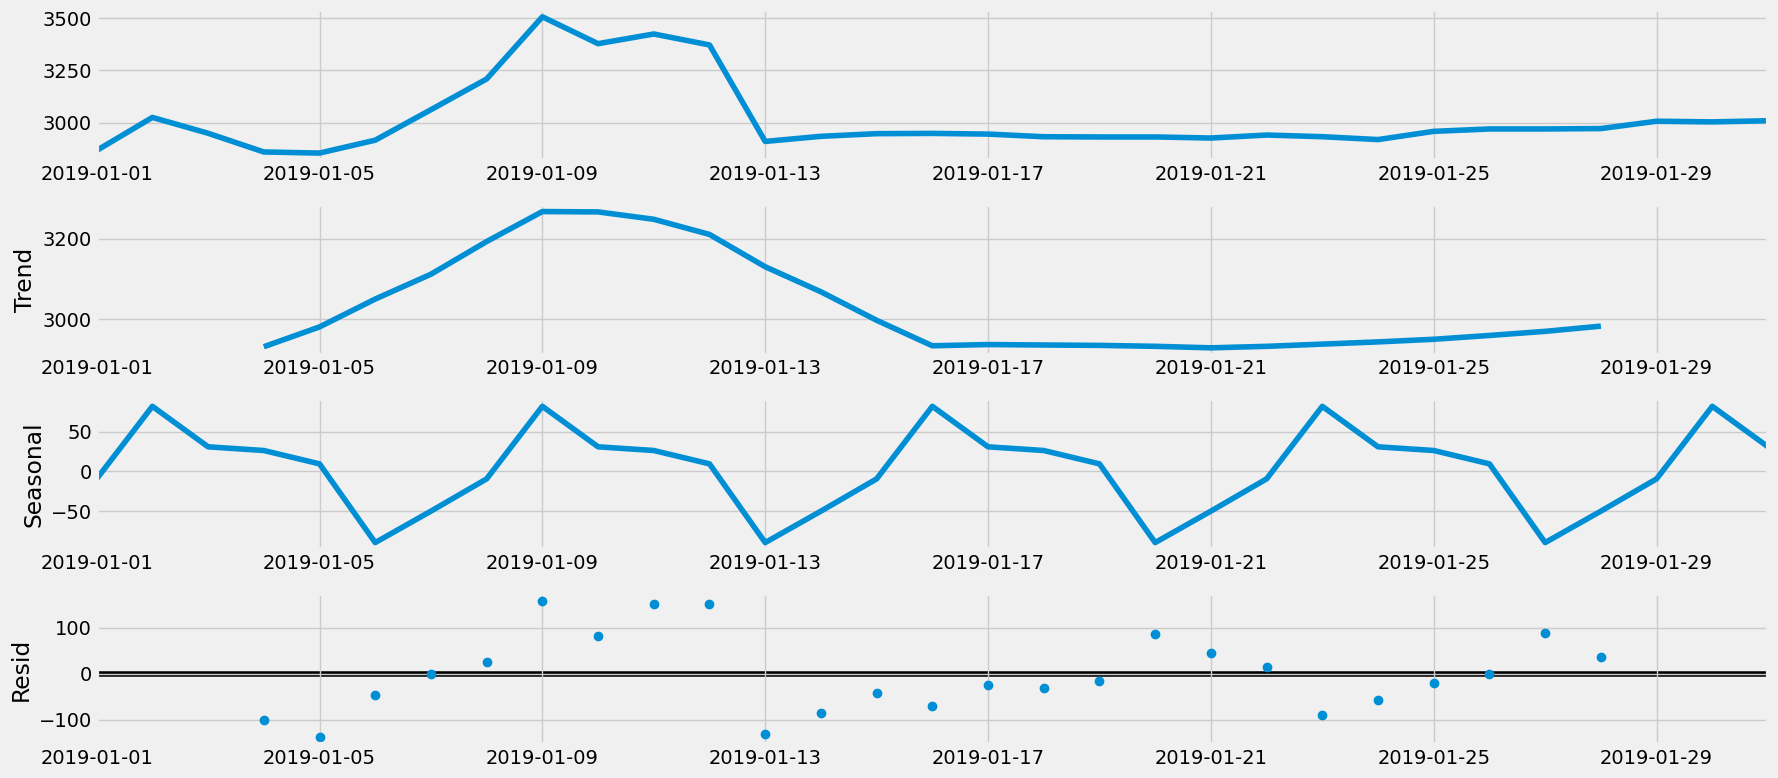



*************************************************************************************ANALYSIS FOR 2020**************************************************************************



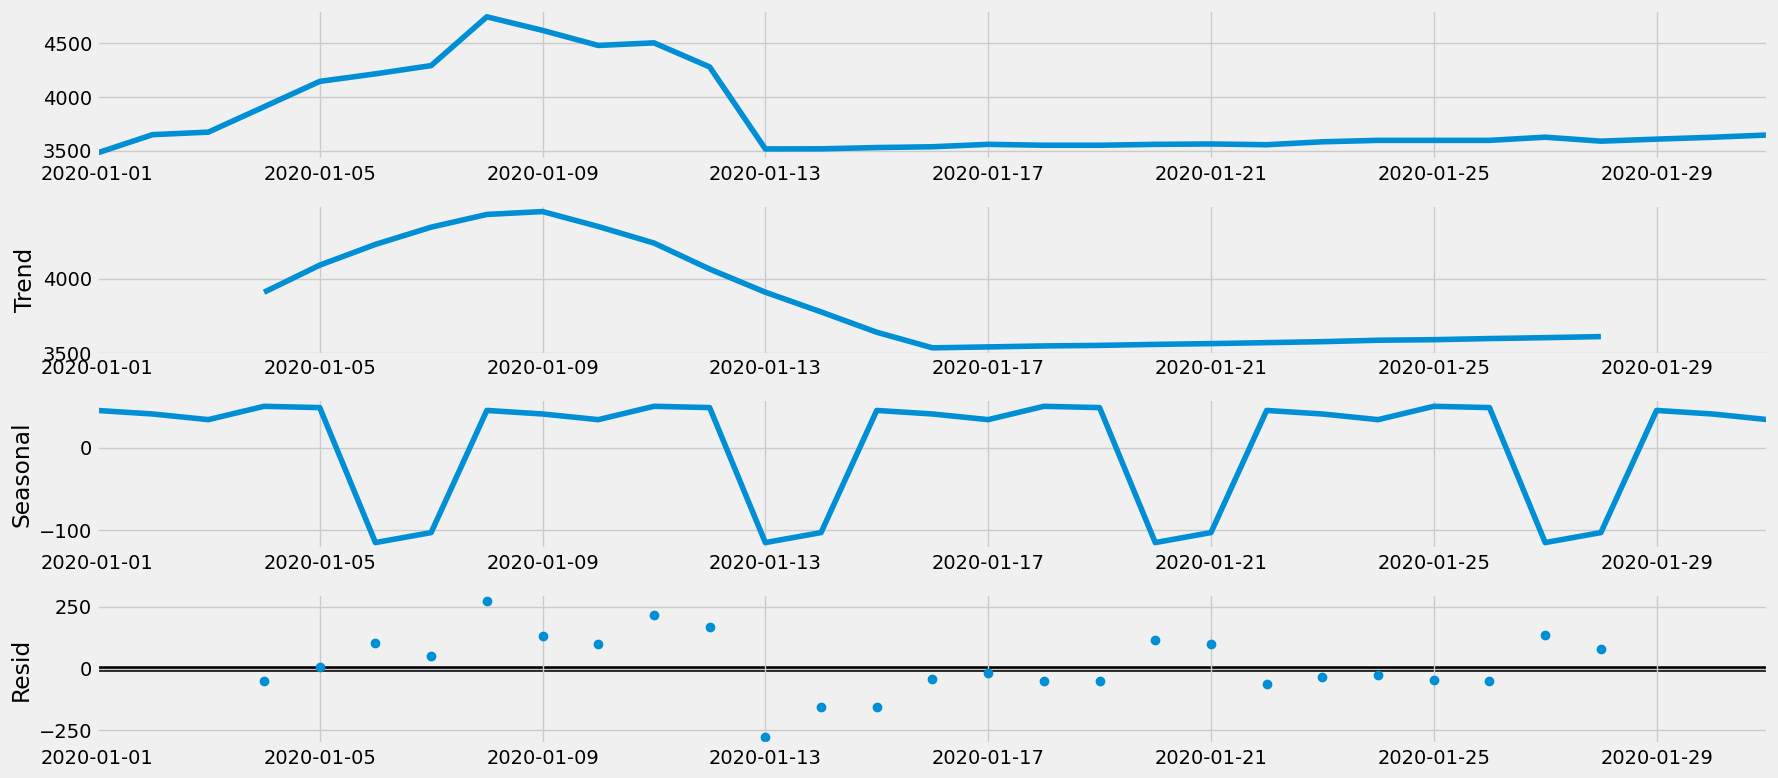



*************************************************************************************ANALYSIS FOR 2021**************************************************************************



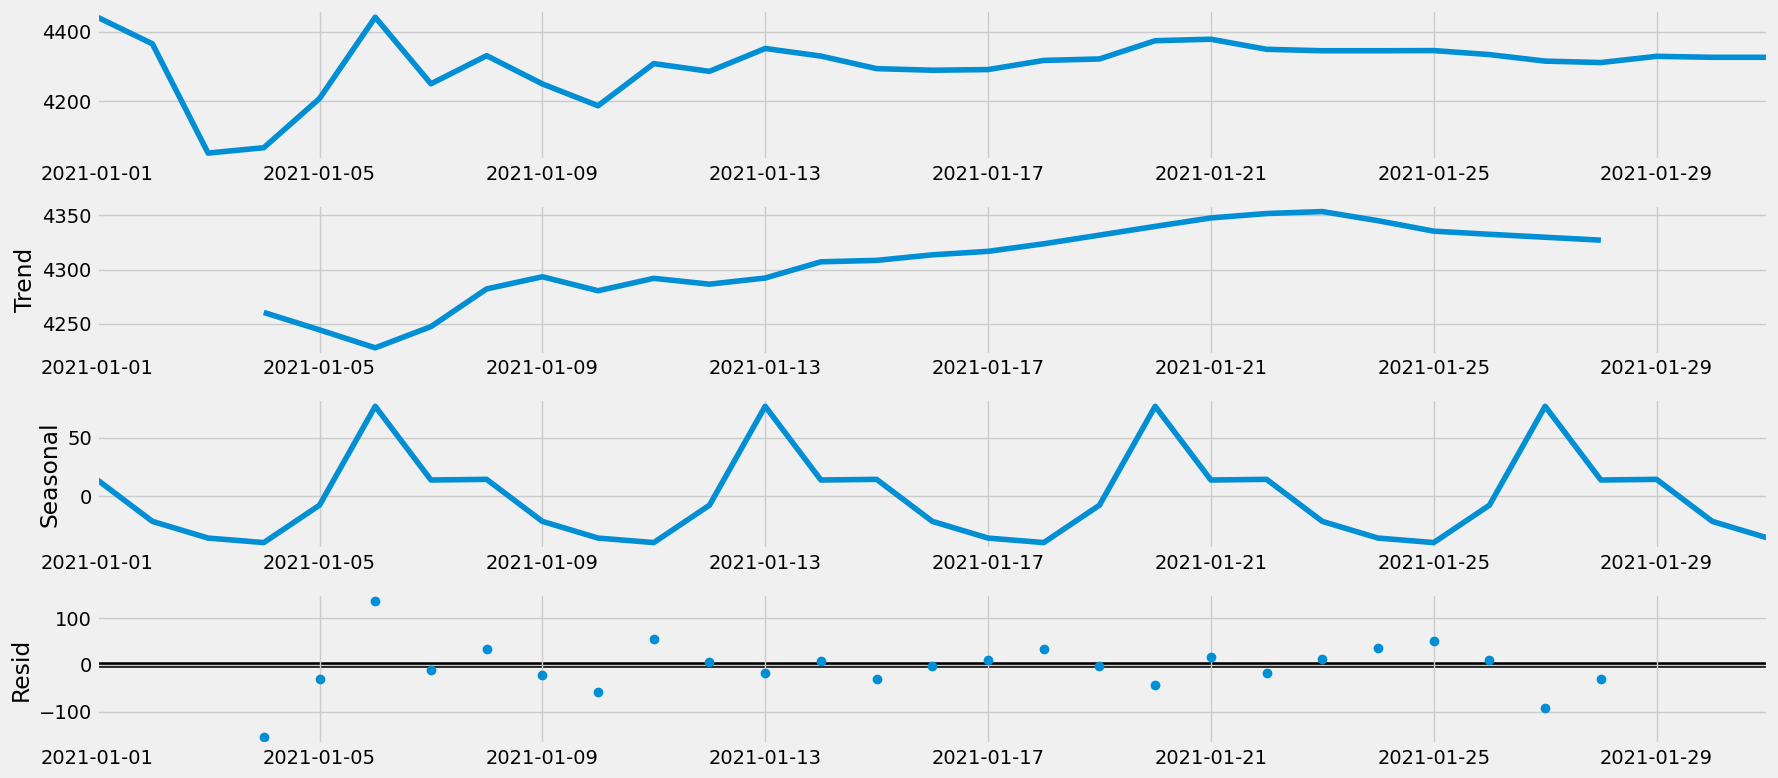

In [29]:
#decomposing time series
rcParams['figure.figsize'] = 18, 8

print("\n")
print("*************************************************************************************ANALYSIS FOR 2016**************************************************************************")
print()
decomposition = sm.tsa.seasonal_decompose(series_jan_2016)
fig = decomposition.plot()
plt.show()

print("\n")
print("*************************************************************************************ANALYSIS FOR 2017**************************************************************************")
print()
decomposition = sm.tsa.seasonal_decompose(series_jan_2017)
fig = decomposition.plot()
plt.show()

print("\n")
print("*************************************************************************************ANALYSIS FOR 2018**************************************************************************")
print()
decomposition = sm.tsa.seasonal_decompose(series_jan_2018)
fig = decomposition.plot()
plt.show()

print("\n")
print("*************************************************************************************ANALYSIS FOR 2019**************************************************************************")
print()
decomposition = sm.tsa.seasonal_decompose(series_jan_2019)
fig = decomposition.plot()
plt.show()

print("\n")
print("*************************************************************************************ANALYSIS FOR 2020**************************************************************************")
print()
decomposition = sm.tsa.seasonal_decompose(series_jan_2020)
fig = decomposition.plot()
plt.show()

print("\n")
print("*************************************************************************************ANALYSIS FOR 2021**************************************************************************")
print()
decomposition = sm.tsa.seasonal_decompose(series_jan_2021)
fig = decomposition.plot()
plt.show()

In [30]:
#checking skews

In [31]:
Train.skew()

price    1.557813
dtype: float64

In [32]:
#checking if log and square root solve the problem

In [33]:
Train_log = np.log(Train) #log transform
Train_log.skew()

price    1.315869
dtype: float64

In [34]:
Train_sqrt = np.sqrt(Train) #square root transform
Train_sqrt.skew()

price    1.436822
dtype: float64

In [35]:
#defining mean absolute percentage error

In [36]:
def mean_absolute_percentage_error(test, predictions): 
    test, predictions = np.array(test), np.array(predictions)
    return np.mean(np.abs((test - predictions) / test)) * 100

### Data Transformation using Boxcox

In [37]:
#Doing boxcox transform

In [38]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox

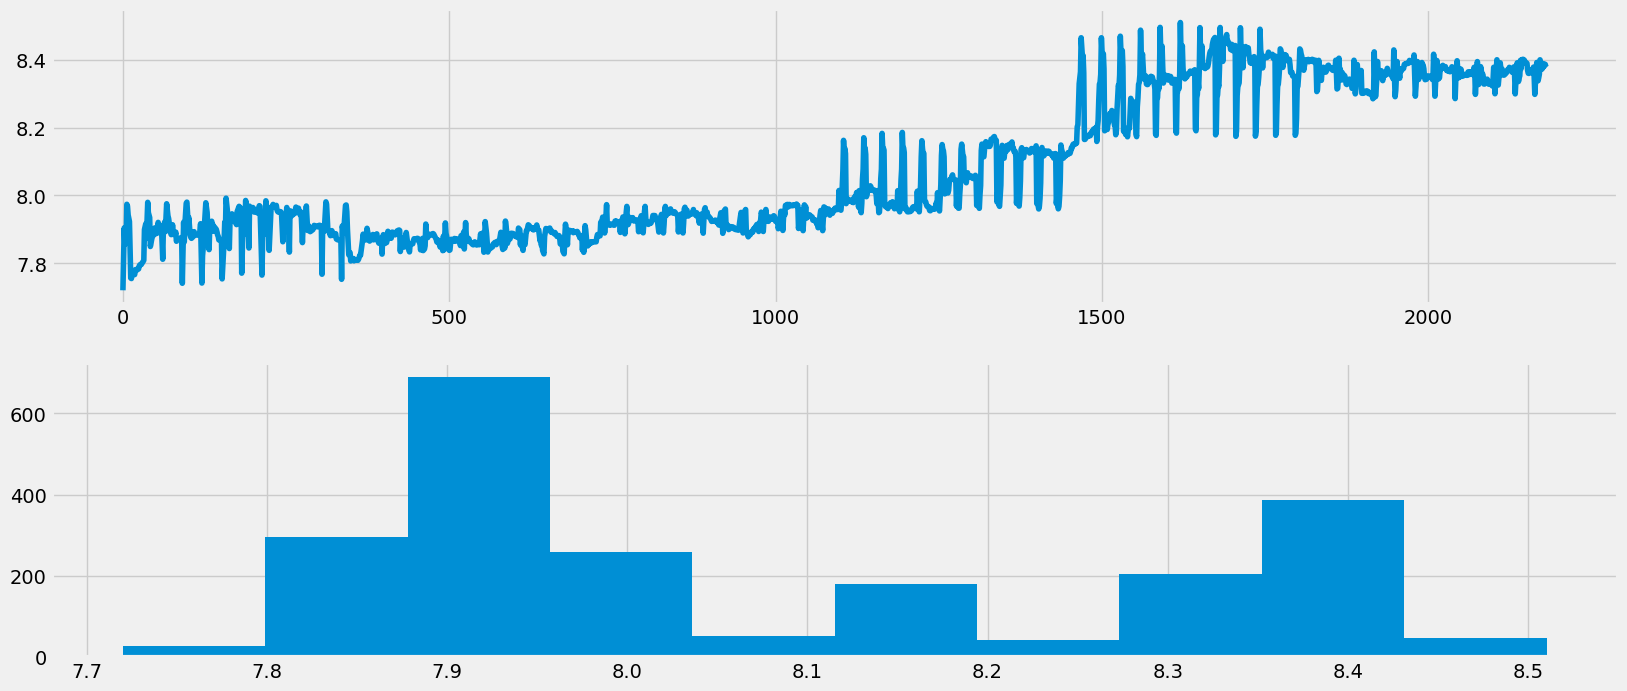

In [40]:
series = read_csv('data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['price']
dataframe['price'] = stats.boxcox(dataframe['price'], lmbda=0.0)
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(dataframe['price'])
# histogram
plt.subplot(212)
plt.hist(dataframe['price'])
plt.show()

### Train-Test Split for Model

In [41]:
#Again doing 80:20 Split
Train=dataframe.iloc[:1745,:]
Test=dataframe.iloc[1745:,]

### Model Buidling & Evaluation (Selected Model: Holts winter exponential smoothing with additive seasonality and additive trend)

In [42]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["price"],seasonal="add",trend="add",seasonal_periods=365).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
mean_absolute_percentage_error(pred_hwe_add_add,Test.price)

1.4645100939660507

In [43]:
hwe_model_add_add = ExponentialSmoothing(dataframe["price"],seasonal="add",trend="add",seasonal_periods=365).fit()

### Forecasting for next 30 days

In [44]:
Forecasted_price = hwe_model_add_add.forecast(30)
Forecasted_price

2182    8.377303
2183    8.381368
2184    8.381694
2185    8.382596
2186    8.388206
2187    8.391305
2188    8.390212
2189    8.390604
2190    8.392281
2191    8.409352
2192    8.451921
2193    8.440034
2194    8.434284
2195    8.445857
2196    8.474408
2197    8.492107
2198    8.499794
2199    8.521255
2200    8.507746
2201    8.498881
2202    8.467972
2203    8.406962
2204    8.413809
2205    8.414776
2206    8.415063
2207    8.417089
2208    8.415282
2209    8.416324
2210    8.417501
2211    8.419645
dtype: float64

### Doing Inverse of Transform to get True Predictions

In [45]:
Forecasted_price_true = inv_boxcox(Forecasted_price, 0.0)
Forecasted_price_true

2182    4347.267279
2183    4364.976703
2184    4366.398957
2185    4370.340317
2186    4394.928295
2187    4408.569287
2188    4403.750136
2189    4405.478741
2190    4412.872934
2191    4488.849735
2192    4684.063257
2193    4628.711297
2194    4602.171377
2195    4655.742126
2196    4790.587463
2197    4876.128228
2198    4913.756588
2199    5020.351716
2200    4952.987435
2201    4909.272733
2202    4759.852741
2203    4478.136857
2204    4508.900927
2205    4513.262277
2206    4514.561940
2207    4523.717126
2208    4515.549029
2209    4520.255533
2210    4525.580141
2211    4535.291781
dtype: float64

### Plotting predictions in graph

In [46]:
series_no_inx = series_2.reset_index()
series_no_inx

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [47]:
Forecasted_price_true

2182    4347.267279
2183    4364.976703
2184    4366.398957
2185    4370.340317
2186    4394.928295
2187    4408.569287
2188    4403.750136
2189    4405.478741
2190    4412.872934
2191    4488.849735
2192    4684.063257
2193    4628.711297
2194    4602.171377
2195    4655.742126
2196    4790.587463
2197    4876.128228
2198    4913.756588
2199    5020.351716
2200    4952.987435
2201    4909.272733
2202    4759.852741
2203    4478.136857
2204    4508.900927
2205    4513.262277
2206    4514.561940
2207    4523.717126
2208    4515.549029
2209    4520.255533
2210    4525.580141
2211    4535.291781
dtype: float64

In [48]:
series_no_inx_dec = series_no_inx[2050:]
series_no_inx_dec

,date,price
2050,2021-08-12,4324.5
2051,2021-08-13,4236.0
2052,2021-08-14,4239.8
2053,2021-08-15,4239.8
2054,2021-08-16,4255.5
...,...,...
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1


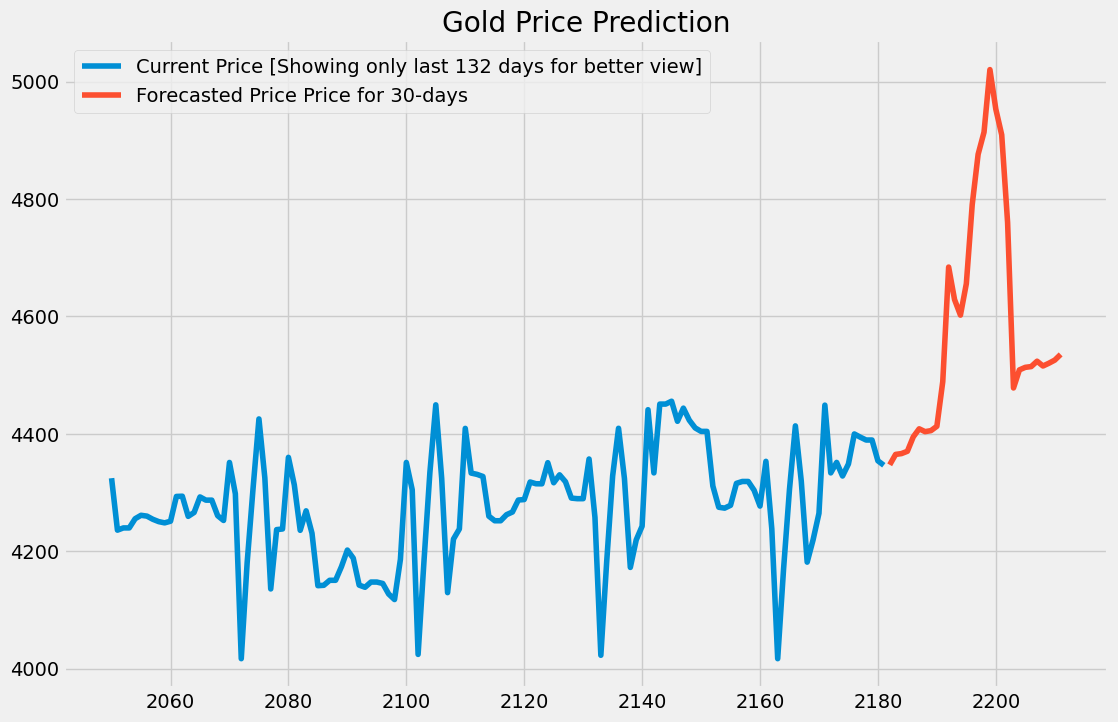

In [49]:
series_no_inx_dec['price'].plot(figsize=(12,8),legend=True,label='Current Price [Showing only last 132 days for better view]')
Forecasted_price_true.plot(legend=True,label='Forecasted Price Price for 30-days')
plt.title('Gold Price Prediction');